In [79]:
%matplotlib inline
from som_cluster_lib import*
import numpy as np

rest_DMN_funconn_components = np.load('rest_DMN_funconn_components.npy')
MWQ_afterRS_components = np.load('MWQ_afterRS_components.npy')
#try to give component names
taskLabels = ['PosEmo/Here&Now','Decoupling-Distant','Words/Images','Realistic-self','Intrusive/Other',
                  'Thematic-Deliberate/Details','Habit-abstract', 'other-details', 'Intrusive-Distant',
                 'Spontaneous-Pos-Important', 'Deliberate-Problem', 'Future/Past', 'Important-self']

In [12]:
print rest_DMN_funconn_components.shape

(164L, 13L)


In [133]:
np.std(rest_DMN_funconn_components[:,0], axis=0)

0.526651032532371

In [134]:
rest_DMN_funconn_components[:,0].shape

(164L,)

In [135]:
data = np.zeros((164,1))
data.flat[:164] = rest_DMN_funconn_components[:,0]
som_funconn_1 = somWrap(data, h = 10, w = 10, init = 'random')
descView(som_funconn_1)

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 19

 epoch: 1 ---> elapsed time:  0.004000, quantization error: 0.022135

 epoch: 2 ---> elapsed time:  0.000000, quantization error: 0.628082

 epoch: 3 ---> elapsed time:  0.004000, quantization error: 0.243849

 epoch: 4 ---> elapsed time:  0.004000, quantization error: 0.167711

 epoch: 5 ---> elapsed time:  0.008000, quantization error: 0.169899

 epoch: 6 ---> elapsed time:  0.000000, quantization error: 0.152711

 epoch: 7 ---> elapsed time:  0.000000, quantization error: 0.149164

 epoch: 8 ---> elapsed time:  0.002000, quantization error: 0.133645

 epoch: 9 ---> elapsed time:  0.002000, quantization error: 0.124254

 epoch: 10 ---> elapsed time:  0.001000, quantization error: 0.118658

 epoch: 11 ---> elapsed time:  0.001000, quantization error: 0.111374

 epoch: 12 ---> elapsed time:  0.002000, quantization error: 0.102551

 epoch: 13 ---> e

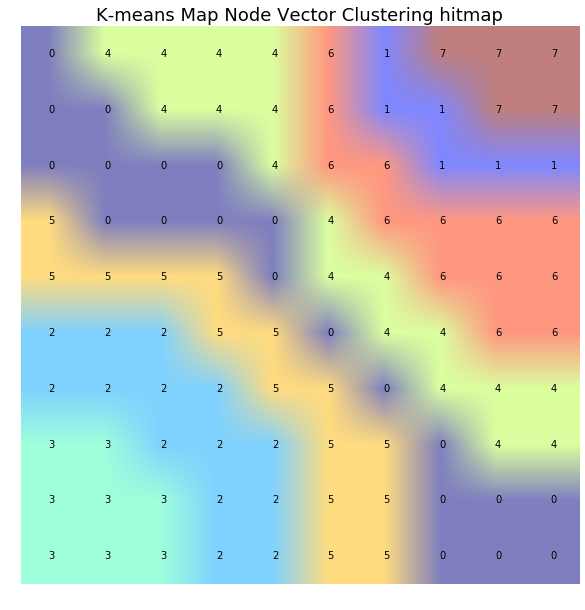

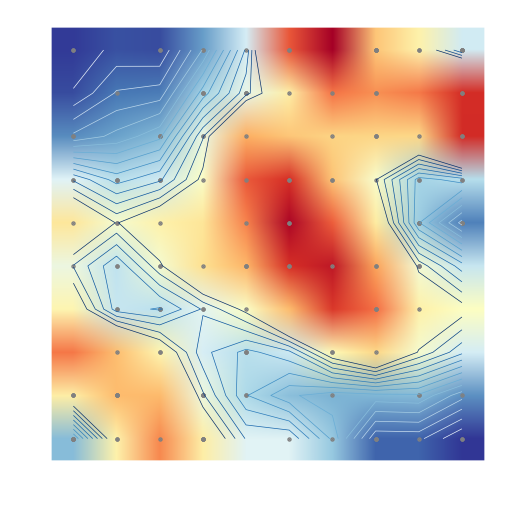

In [136]:
descView(som_funconn_1)

In [145]:
som_funconn_1.codebook.grid_dist()

TypeError: grid_dist() takes exactly 2 arguments (1 given)

In [107]:
tomr_funconn = tomeGen(som_funconn_randie,rest_DMN_funconn_components)
tomr_funconn.

(164L, 400L)

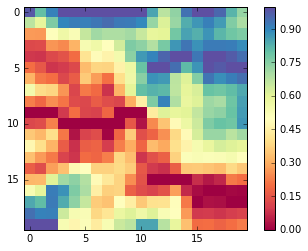

In [115]:
sliceheat = sliceHeat(som_funconn_randie.codebook,rest_DMN_funconn_components[0,:],sliceLabel='',graph = True)

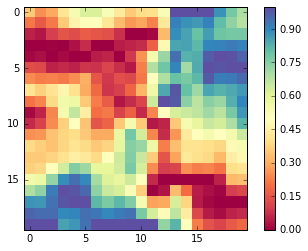

In [117]:
sliceheat = sliceHeat(som_funconn_randie.codebook,rest_DMN_funconn_components[1,:],sliceLabel='',graph = True)

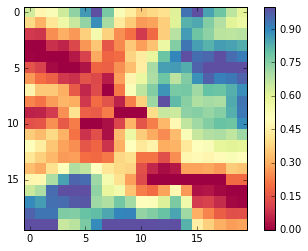

In [122]:
sliceheat = sliceHeat(som_funconn_randie.codebook,rest_DMN_funconn_components[100,:],sliceLabel='',graph = True)

In [99]:
# train/ test split
clsf_comp1 = svm.SVR(C=1.0, epsilon=0.2, kernel='rbf',gamma=.01)
clsf_comp2 = svm.SVR(C=1.0, epsilon=0.2, kernel='rbf',gamma=.01)
clsf_comp3 = svm.SVR(C=1.0, epsilon=0.2, kernel='rbf',gamma=.01)
clsf_comp4 = svm.SVR(C=1.0, epsilon=0.2, kernel='rbf',gamma=.01)
clsf_comp5 = svm.SVR(C=1.0, epsilon=0.2, kernel='rbf',gamma=.01)
clsf_comp6 = svm.SVR(C=1.0, epsilon=0.2, kernel='rbf',gamma=.01)
clsf_comp7 = svm.SVR(C=1.0, epsilon=0.2, kernel='rbf',gamma=.01)
clsf_comp8 = svm.SVR(C=1.0, epsilon=0.2, kernel='rbf',gamma=.01)
clsf_comp9 = svm.SVR(C=1.0, epsilon=0.2, kernel='rbf',gamma=.01)
clsf_comp10 = svm.SVR(C=1.0, epsilon=0.2, kernel='rbf',gamma=.01)
clsf_comp11 = svm.SVR(C=1.0, epsilon=0.2, kernel='rbf',gamma=.01)
clsf_comp12 = svm.SVR(C=1.0, epsilon=0.2, kernel='rbf',gamma=.01)
clsf_comp13 = svm.SVR(C=1.0, epsilon=0.2, kernel='rbf',gamma=.01)

clsf_comp1.fit(RS_train[:10,:], MWQ_train[:10, 0])

ValueError: could not convert string to float: MWthoughts_LC_1

ValueError: x and y must be the same size

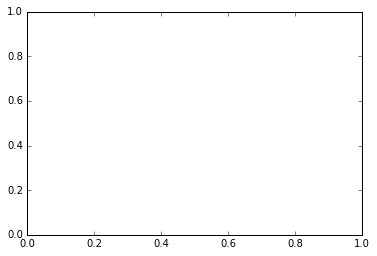

In [101]:
import matplotlib.pyplot as plt
plt.scatter(flat_funconn, MWQ_train[:, 0], c='k', label='data')
plt.xlabel('RS data')
plt.ylabel('Mind wandering latenet component')
plt.show()

In [86]:
pscore

-0.057561970372798088

In [ ]:
from sklearn.svm import SVR
# three types of kernel
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)



In [68]:
funconn_lables = []
MWQ_lables = []
for i in range(1,14):
    funconn_lables.append('funconn_LC_%i' %(i))
    MWQ_lables.append('MWthoughts_LC_%i' %(i))
funconn_lables = np.tile(np.array(funconn_lables),(164, 1))
MWQ_lables = np.tile(np.array(MWQ_lables),(164, 1))